# In class Assignment3: Linear Regression, Support Vector Regression (SVR), Decision Tree Regression and Random Forest Regression

## Importing the libraries

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [217]:
data=pd.read_csv('heart.data.csv')

## Check out if there any missing value and any categorical column

In [218]:
data.isnull().sum()

biking           3
smoking          4
heart.disease    1
dtype: int64

C:\Users\15024\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='biking', ylabel='Density'>

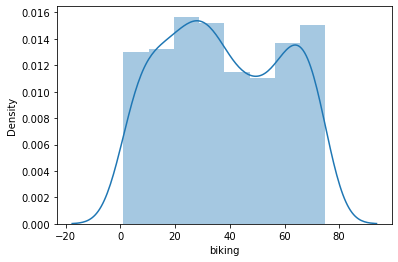

In [219]:
sns.distplot(data['biking'])

In [220]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='median')
data['biking']=imputer.fit_transform(data[['biking']])

C:\Users\15024\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='smoking', ylabel='Density'>

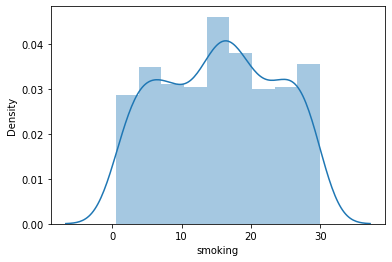

In [221]:
sns.distplot(data['smoking'])

In [222]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='median')
data['smoking']=imputer.fit_transform(data[['smoking']])

C:\Users\15024\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heart.disease', ylabel='Density'>

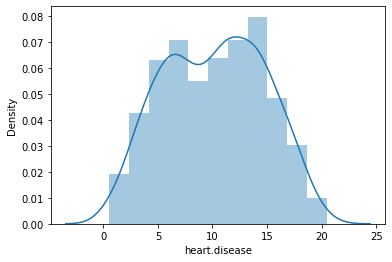

In [223]:
sns.distplot(data['heart.disease'])

In [224]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
data['heart.disease']=imputer.fit_transform(data[['heart.disease']])

## Create different copies of your dataset for using in Linear Regression, SVR, DT, RF

In [225]:
data1=data
data2=data
data3=data
data4=data

## 1. Linear Regression

In [226]:
X=data1[['biking','smoking']]

In [227]:
y=data1[['heart.disease']]

## Splitting the dataset into the Training set and Test set¶

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Training the Linear Regression model on the Training set

In [229]:
from sklearn.linear_model import LinearRegression #run from the top if it doesnt work.
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [230]:
y_pred=regressor.predict(X_test)

## validation dataset
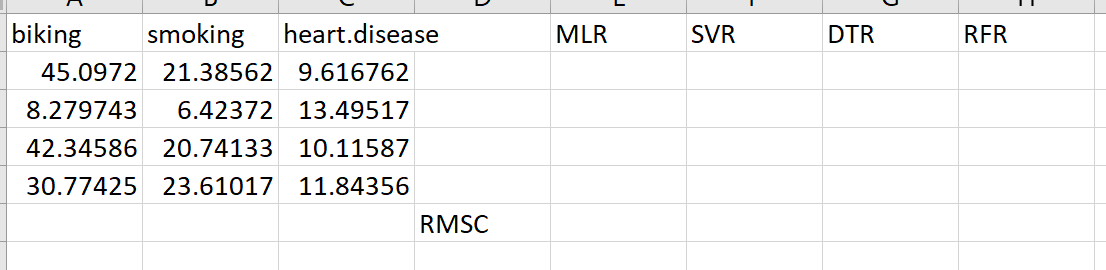!
Fill up the excel

In [231]:
#Case1
regressor.predict([[45.0972, 21.38562]])

array([[9.75561656]])

In [232]:
#Case2
regressor.predict([[8.279743, 6.42372]])

array([[14.46759702]])

In [233]:
#Case3
regressor.predict([[42.34586, 20.74133]])

array([[10.19262203]])

In [234]:
#Case4
regressor.predict([[30.77425, 23.61017]])

array([[13.03000554]])

## Evaluating the Model Performance using r2score and rmsc

In [235]:
from sklearn.metrics import r2_score
print('r2-score', r2_score(y_test, y_pred))

r2-score 0.9720250268006815


In [236]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print(rms)

0.7435652150227529


# 2. Support Vector Regressor

## Selecting the copied dataset

In [237]:
data1.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


## Splitting the dataset into the Training set and Test set

In [238]:
X=data2[['biking','smoking']]
y=data2[['heart.disease']]

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Feature Scaling:- X_train and y_train
- X_train = sc_X.fit_transform(X_train)
- y_train = sc_y.fit_transform(y_train)

In [240]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X_train=sc_X.fit_transform(X_train)
y_train=sc_y.fit_transform(y_train)


## Training the SVR model on the Training set

In [241]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

C:\Users\15024\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting the Test set results

In [242]:
y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))


## Validation dataset
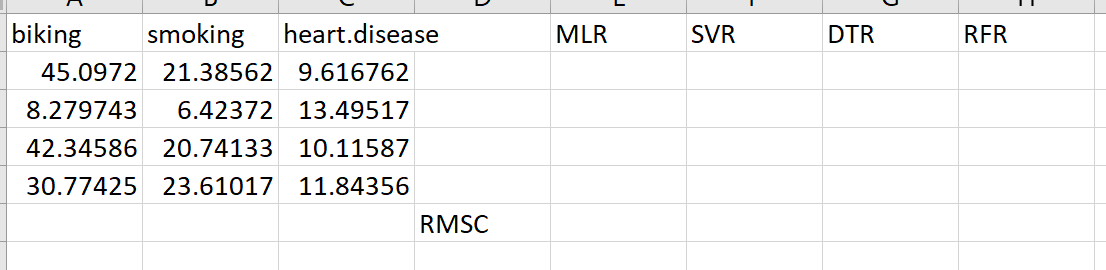
Fill up the excel

In [243]:
#Case1 check the sample
sc_y.inverse_transform(regressor.predict(sc_X.transform([[45.092, 21.385]])).reshape(-1,1))

array([[9.53733136]])

In [244]:
#Case2
sc_y.inverse_transform(regressor.predict(sc_X.transform([[8.279743, 6.42372]])).reshape(-1,1))

array([[14.46641227]])

In [245]:
#Case3
sc_y.inverse_transform(regressor.predict(sc_X.transform([[42.34586, 20.74133]])).reshape(-1,1))

array([[9.97501722]])

In [246]:
#Case3
sc_y.inverse_transform(regressor.predict(sc_X.transform([[30.77425, 23.61017]])).reshape(-1,1))

array([[12.98146213]])

## Evaluating the Model Performance using r2score and rmsc

In [247]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print(rms)

0.7605018739665738


In [248]:
from sklearn.metrics import r2_score
print('r2-score', r2_score(y_test, y_pred))

r2-score 0.9707361052049128


## 3. Decision Tree Regression

##  Selecting the copied dataset

In [249]:
data2.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


## Splitting the dataset into the Training set and Test set

In [250]:
X=data3[['biking', 'smoking']]
y=data3[['heart.disease']]

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Training the Decision Tree Regression model on the Training set

In [252]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree #tree diagram

In [253]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [254]:
y_pred=regressor.predict(X_test)

## Validation dataset
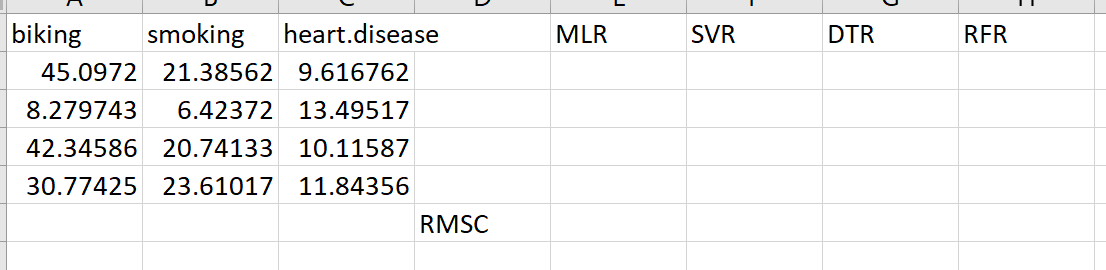
Fill up the excel

In [255]:
#Case1
regressor.predict([[45.0972, 21.38562]])

array([9.79848336])

In [256]:
#Case2
regressor.predict([[8.279743, 6.42372]])

array([14.60030161])

In [257]:
#Case3
regressor.predict([[42.34586, 20.74133]])

array([9.79848336])

In [258]:
#Case3
regressor.predict([[30.77425, 23.61017]])

array([13.75798666])

## Evaluating the Model Performance using r2score and rmsc

In [259]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print(rms)

1.056331075917196


In [260]:
from sklearn.metrics import r2_score
print('r2-score', r2_score(y_test, y_pred))

r2-score 0.9435411974966879


# 4. Random Forest Regression

## Selecting the copied dataset

## Splitting the dataset into the Training set and Test set

In [272]:
X=data4[['biking','smoking']]
y=data4[['heart.disease']]

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Decision Tree Regression model on the Training set

In [274]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train,y_train)

<ipython-input-274-2ea0e0c5dbb5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


RandomForestRegressor(n_estimators=20, random_state=0)

## Predicting the Test set results

In [275]:
y_pred=regressor.predict(X_test)

## Validation dataset
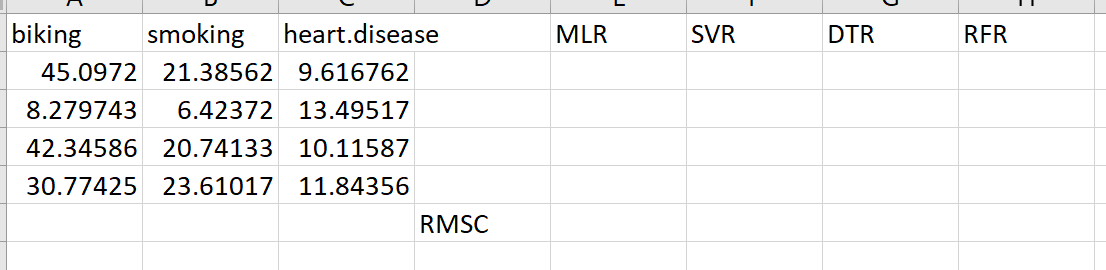

In [276]:
#Case1
regressor.predict([[45.0972, 21.38562]])

array([9.57786008])

In [277]:
#Case2
regressor.predict([[8.279743, 6.42372]])

array([14.37827257])

In [278]:
#Case3
regressor.predict([[42.34586, 20.74133]])

array([9.78370836])

In [279]:
#Case3
regressor.predict([[30.77425, 23.61017]])

array([13.19211326])

## Evaluating the Model Performance

In [280]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print('RMSE= ',rms)

RMSE=  0.8449843132412269


In [281]:
from sklearn.metrics import r2_score
print('r2-score', r2_score(y_test, y_pred))

r2-score 0.9638732542357534
